
<br>
<center>
<font size='7' style="color:#0D47A1">  <b>CHEMICAL GNNs</b> </font>
</center>

<hr style= "height:3px;">
<br>


<hr style= "height:1px;">
<font size='6' style="color:#000000">  <b>Content</b> </font>
<a name="content"></a>
<br>
<br>

1. [Abstract](#abstract) 
<br>

2. [Setup](#setup)
<br>

3. [Loading Data](#loading)
<br>

4. [Explore the Data](#exploration)
<br>

5. [Data Cleaning](#cleaning)
<br>

6. [Feature Selection](#features)
<br>

7. [Results & Discussion](#results)
<br>

8. [Perspectives](#perspectives)
<br>

9. [References](#references)
<br>

<hr style= "height:1px;">

<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>1. Abstract</b> </font>
<a name="setup"></a>

[[ Back to Top ]](#content)
<br>
<br>

<font size='4'>

In this Notebook we studied 3 different strategies for the training of various machine learning models. After comparing and choosing the best training strategy we proceed to evaluate the models with an additional cross validation step. The model performance are reported in with two generic metrics and choose or definition for a better metric for the problem at hand is a work in progress. 

</font> 

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>Purpose</b></font>

<br>
<font size='4'>
    
Obtain the best training strategy for generic ML Model.

</font> 


<br>
<br>


<br>
<br>
<font size='5' style="color:#4CAF50">  <b>Goals</b></font>


 - Find the best training strategy.
 - Define custome metrics for evaluation.
 - Compare several ML models.
 - Obtain statistics of model training with cross validation.
 

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>Methodology/Plan</b></font>

1. Strategy 1.
 - No feature or targe transformation.
2. Strategy 2.
 - Feature transformation.
 - Target transformation.
3. Strategy 3.
 - Feature transformation.
 - Target transformation.
4. Benchmark.
 - Include cross validation in the training process.
 



<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>2. Setup</b> </font>
<a name="setup"></a>

[[ Back to Top ]](#content)
<br>
<br>

The following imports are divided by sections according to their role in the notebook. 



In [ ]:
!pip install graph_nets matplotlib scipy "tensorflow>=1.15,<2" "dm-sonnet<2" "tensorflow_probability<0.9"

In [1]:

# Data Science 
# ==============================================================================
import pandas as pd
import numpy as np
from scipy.stats import gmean


# Sklearn Basic imports
# ==============================================================================
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


!pip install rdkit-pypi
# Rdkit import for molecular features
# ==============================================================================
import rdkit
import rdkit.Chem
from rdkit.Chem import MolFromSmiles
import rdkit.Chem.Fragments
import rdkit.Chem.Descriptors
import rdkit.Chem.rdchem



# Ploting 
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:

import networkx as nx
import graph_nets as gn
from graph_nets import blocks
from graph_nets import graphs
from graph_nets import modules
from graph_nets import utils_np
from graph_nets import utils_tf


In [2]:

pd.set_option("display.precision", 3)


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>3. Loading Data</b> </font>
<a name="loading"></a>

[[ Back to Top ]](#content)

<br>
<br>
<br>


In [3]:

# Load the raw data
# ==============================================================================
df_raw = pd.read_csv("https://raw.githubusercontent.com/RigelAlgebar/RIIA-CHEMICAL-GNN/master/data/delaney-processed.csv")
df_raw.head()


,Unnamed: 0,Molecular Weight,Polar Surface Area,Number of Rings,Number of Rings.1,Number of Valence Electrons,Number of Aromatic Atoms,Number of Conjugated Bonds,measured log solubility in mols per litre
0,1,201.225,42.24,2,2,76,11,4,-3.30
1,2,152.237,17.07,0,0,62,0,3,-2.06
2,4,84.143,0.00,1,1,26,5,0,-1.33
3,6,326.437,0.00,2,2,88,12,1,-7.32
4,7,272.388,40.46,4,4,108,6,1,-5.03


In [5]:

# Quick overview of the data statistics
# ==============================================================================
df_raw.describe()


,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


In [6]:

# We whould never modify the raw external data so here we take the data we need and store it in our own
# dataframe for further analysis
# ==============================================================================
df = df_raw[['Molecular Weight','Minimum Degree','Number of H-Bond Donors','Number of Rotatable Bonds',
             'Polar Surface Area','Number of Rings','smiles','measured log solubility in mols per litre']]
df.head()


,Molecular Weight,Minimum Degree,Number of H-Bond Donors,Number of Rotatable Bonds,Polar Surface Area,Number of Rings,smiles,measured log solubility in mols per litre
0,457.432,1,7,7,202.32,3,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77
1,201.225,1,1,2,42.24,2,Cc1occc1C(=O)Nc2ccccc2,-3.30
2,152.237,1,0,4,17.07,0,CC(C)=CCCC(C)=CC(=O),-2.06
3,278.354,2,0,0,0.00,5,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87
4,84.143,2,0,0,0.00,1,c1ccsc1,-1.33


In [7]:

# Let's take a look at the molecules' statistics grouping them by their number of rings
# Having rings is an important molecular descriptor 
# ==============================================================================
df.groupby('Number of Rings').describe()['Molecular Weight']


,count,mean,std,min,25%,50%,75%,max
Number of Rings,,,,,,,,
0,317.0,129.929306,67.641041,16.043,87.12200,112.9870,156.26900,384.487
1,386.0,183.279083,75.329183,58.080,124.13900,165.6840,226.27600,430.934
2,221.0,245.342665,87.359816,117.151,167.25800,232.3270,303.67100,498.662
3,116.0,294.051284,84.638532,152.196,238.03025,287.4865,349.68700,505.206
4,63.0,317.312937,64.425228,202.256,269.36400,314.4250,361.45800,478.513
5,16.0,319.547250,86.175371,252.316,252.31600,273.3565,384.29050,527.414
6,4.0,431.788250,116.709643,276.338,380.05700,452.6345,504.36575,545.546
7,3.0,466.834333,149.220630,300.360,405.97050,511.5810,550.07150,588.562
8,2.0,772.949500,11.313001,764.950,768.94975,772.9495,776.94925,780.949


In [5]:

# Generate the Python Mols objects
# ==============================================================================
df_raw['mol'] = df_raw['smiles'].apply(lambda x: rdkit.Chem.MolFromSmiles(x))


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>4. Explore the Data</b> </font>
<a name="exploration"></a>

[[ Back to Top ]](#content)

<br>
<br>
<br>


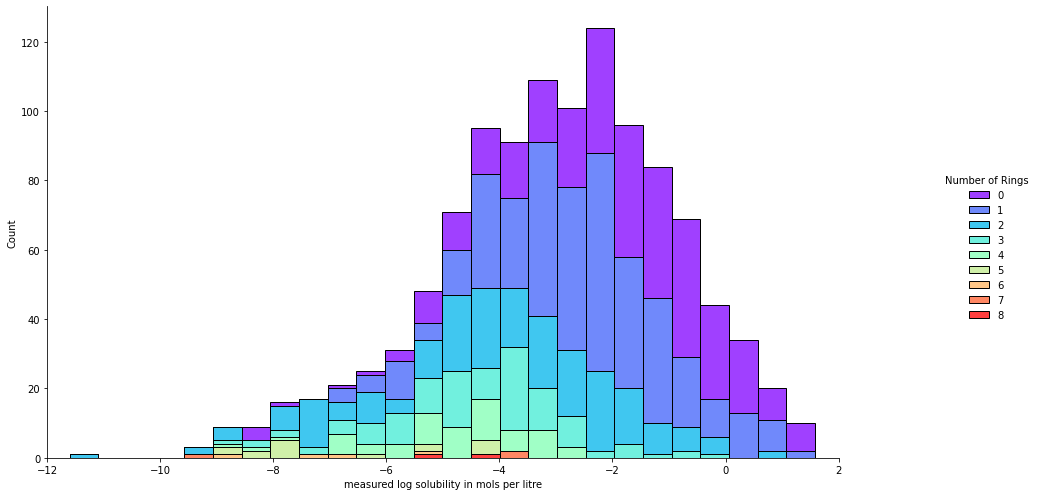

In [8]:

# It is important to know the distribution of the target variable
# ==============================================================================
sol_hist = sns.displot(x='measured log solubility in mols per litre', hue='Number of Rings', 
           palette='rainbow', height=7, data=df, multiple="stack")

sol_hist.fig.set_figwidth(15)
plt.xlim(-12, 2)
plt.show()


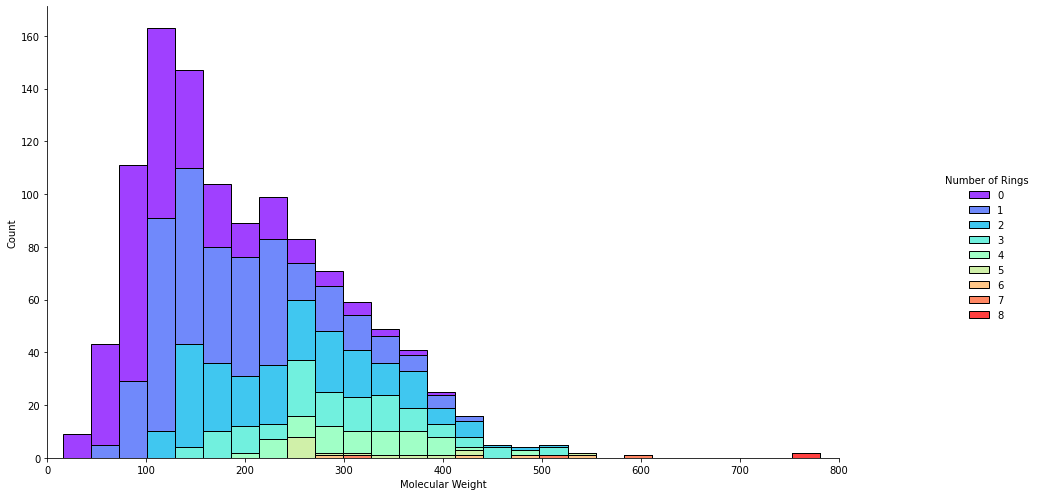

In [9]:

# We should also know how our independent varibles are distributed
# ==============================================================================
mw_hist = sns.displot(x='Molecular Weight', hue='Number of Rings', palette='rainbow', height=7,
           data=df, multiple="stack")

mw_hist.fig.set_figwidth(15)
plt.xlim(0,800)
plt.show()


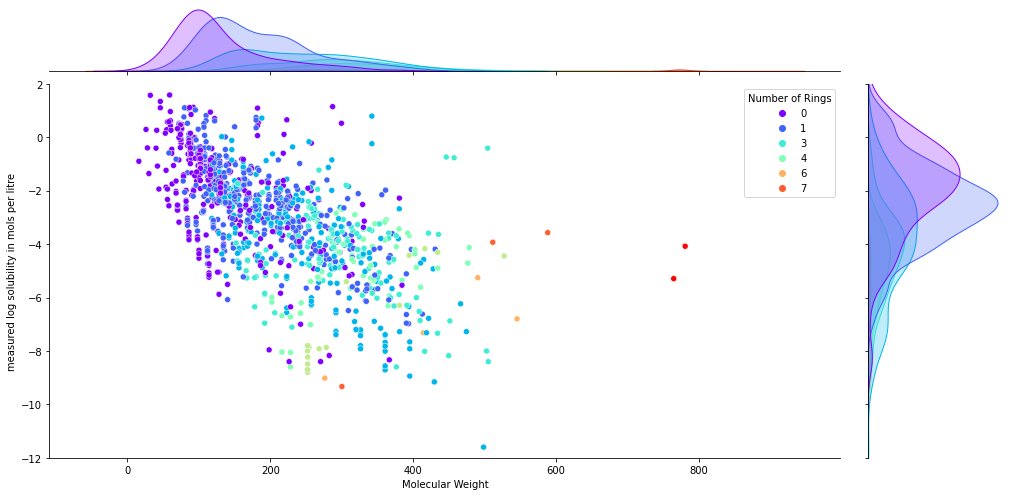

In [10]:

# Here we show the distribution of both the solubility and the molecular weight.
# Both variables grouped by the number of rings in the molecules.
# ==============================================================================
jointplot_mw = sns.jointplot(x='Molecular Weight', y='measured log solubility in mols per litre', 
               hue='Number of Rings', 
               palette='rainbow', height=7,
               data=df)

jointplot_mw.fig.set_figwidth(15)
plt.ylim(-12,2)
plt.show()


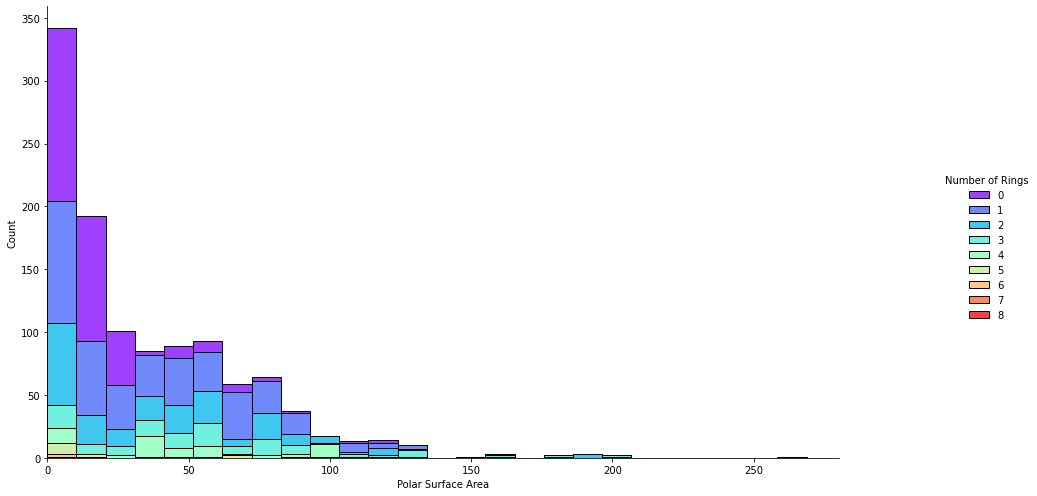

In [11]:

# Same analysis as before for the polar surface area
# ==============================================================================
sol_hist = sns.displot(x='Polar Surface Area', hue='Number of Rings', palette='rainbow', height=7,
           data=df, multiple="stack")

sol_hist.fig.set_figwidth(15)
plt.xlim(0,280)
plt.show()


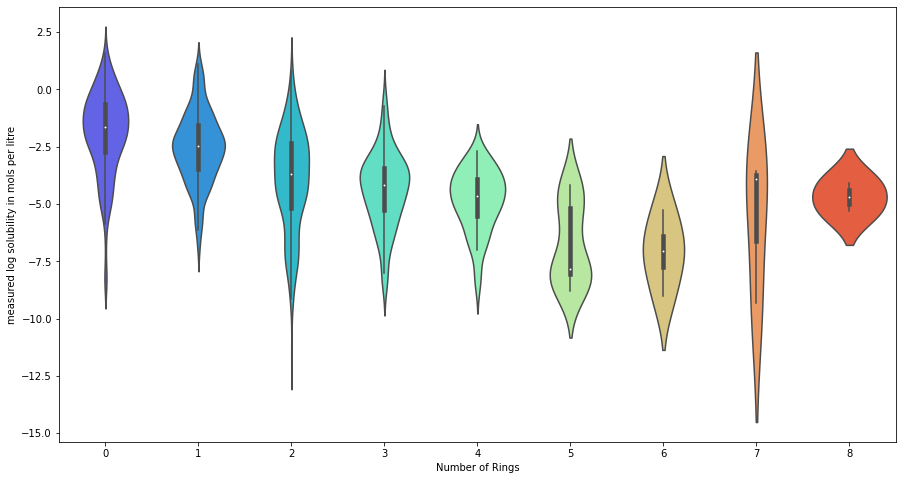

In [12]:

# This violon plot shows the distribution of the measured solubilities as a funciton of molecular weight
# Molecules are again gruped by their number of rings
# ==============================================================================
plt.figure(figsize=(15,8))

mw_boxplot = sns.violinplot(x='Number of Rings', y='measured log solubility in mols per litre',  
             palette='rainbow',
             data=df)


plt.show()


In [4]:

# Quick overview of the data statistics
# ==============================================================================
df_raw.describe()


,Unnamed: 0,Molecular Weight,Polar Surface Area,Number of Rings,Number of Rings.1,Number of Valence Electrons,Number of Aromatic Atoms,Number of Conjugated Bonds,measured log solubility in mols per litre
count,1015.000,1015.000,1015.000,1015.000,1015.000,1015.000,1015.000,1015.000,1015.000
mean,558.767,195.746,32.144,1.242,1.242,68.536,4.831,1.658,-2.939
std,325.005,93.801,29.465,1.139,1.139,31.774,4.788,1.876,1.963
min,1.000,16.043,0.000,0.000,0.000,8.000,0.000,0.000,-11.600
25%,276.000,118.245,0.000,0.000,0.000,42.000,0.000,0.000,-4.180
50%,556.000,175.000,26.300,1.000,1.000,60.000,6.000,1.000,-2.770
75%,837.500,264.647,52.775,2.000,2.000,92.000,6.000,3.000,-1.595
max,1127.000,505.206,129.420,5.000,5.000,170.000,18.000,9.000,1.580


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [2]:

import tensorflow as tf
from typing import Dict,List


In [42]:

def validate_mol_smiles(smiles: str) -> bool:
    """Validates a SMILES string and returns True if the molecule is chemically
    valid.
    The validation is done at three levels:
        -Wether or not the string produces a valid RDKIT MOL object
        -Checks if MOL object contains more than 1 molecule
        -Creates a chemically valid MOL object if possible, otherwise raises 
        an error
    
    
    Args:
        smiles: string representation of a molecule
    Returns:
        True if the molecule is chemically valid, False otherwise
    """
    
    
    mol = rdkit.Chem.MolFromSmiles(smiles)
    if mol:
        #  GetMolFrags checks wether we have more than one molecule
        if len(rdmolops.GetMolFrags(mol)) > 1:
            return False
        try:
            #  Sanitization check valence (detects invalid values)
            rdmolops.SanitizeMol(mol)
            return True
        except ValueError:
            return False
    
    else:
        return False
    

In [4]:

def senders_vector(molecule: rdkit.Chem.Mol) -> np.array:
    """Creates the sender vector that graphnets
    uses to complete the general dictionary.
    
    
    Args:
        molecule: a vilid RDKIT MOL object
    Returns:
        A numpy array containing the indices of senders atoms
        in graphnets format.
    """
    
    senders = []
    for atom_idx in range(len(molecule.GetAtoms())):
        
        atom = molecule.GetAtomWithIdx(atom_idx)
        senders.extend(len([x.GetIdx() for x in atom.GetNeighbors()])*[atom_idx])
    
    
    return np.array(senders, dtype=np.int32)


In [5]:

def receivers_vector(molecule: rdkit.Chem.Mol) -> np.array:
    """Creates the receiver vector that graphnets
    uses to complete the general dictionary.
    
    
    Args:
        molecule: a vilid RDKIT MOL object
    Returns:
        A numpy array containing the indices of receivers atoms
        in graphnets format.
    """    
    
    receivers = []    
    for atom_idx in range(len(molecule.GetAtoms())):
    
        atom = molecule.GetAtomWithIdx(atom_idx)
        receivers.extend([x.GetIdx() for x in atom.GetNeighbors()])
        
    
    return np.array(receivers, dtype=np.int32)


In [6]:

def edges_vector(molecule: rdkit.Chem.Mol) -> np.array:
    """Creates the EDGES feature vector that graphnets
    uses to complete the general dictionary.
    
    
    Args:
        molecule: a vilid RDKIT MOL object
    Returns:
        A numpy array containing features of the edges
        encoded in numeric format. 
    """    
    
    edges = []
    bond_encoding = {'SINGLE': [1.,0.,0.,0.], 'DOUBLE': [0.,1.,0.,0.], 
    'TRIPLE': [0.,0.,1.,0.], "AROMATIC": [0.,0.,0.,1.]}
    
    
    for i in zip(senders_vector(molecule), receivers_vector(molecule)):
        for bond in molecule.GetBonds():
            if (bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) == (i[0], i[1]): 
                edges.append(bond_encoding[str(bond.GetBondType())]+
                [float(bond.IsInRing())] +
                [float(bond.GetIsConjugated())])
            
            if (bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) == (i[1], i[0]):
                edges.append(bond_encoding[str(bond.GetBondType())]+
                [float(bond.IsInRing())] +
                [float(bond.GetIsConjugated())])
    
    
    
    return np.array(edges, dtype=np.float32)


In [7]:

def nodes_vector(molecule: rdkit.Chem.Mol) -> np.array:
    """Creates the NODES feature vector that graphnets
    uses to complete the general dictionary.
    
    
    Args:
        molecule: a vilid RDKIT MOL object.
    Returns:
        A numpy array containing features of the edges
        encoded in numeric format.
    """  
    
    nodes = []
    hybridization_encoding = {"SP": [1.,0.,0.,0.,.0], "SP2":[0.,1.,0.,0.,.0], 
    "SP3":[0.,0.,1.,0.,.0], "SP3D":[0.,0.,0.,1.,.0], "SP3D2":[0.,0.,0.,0.,1.]}
    
    
    for atom in molecule.GetAtoms():
        nodes.append([atom.GetAtomicNum()]+
        [atom.GetDegree()]+
        [atom.GetImplicitValence()]+
        hybridization_encoding[str(atom.GetHybridization())]+
        [int(atom.IsInRing())]+
        [int(atom.GetIsAromatic())])
    

    return np.array(nodes, dtype=np.float32)


In [8]:

def molecular_dict(molecule: rdkit.Chem.Mol) -> Dict[str, np.array]:
    """Creates general dictionary that graphnets
    uses to create the general INPUT for a GNN model.
    
    
    Args:
        molecule: a valid RDKIT MOL object.
    Returns:
        A dictionary containing:
            -globals: list of GLOBALS features of graph.
            -nodes: NODES feature vector.
            -edges: EDGES feature vector.
            -senders: SENDERS indices vector.
            -reicevers: REICEVERS indices vector.
    """  
    
        
    mol_dict = {
    "globals"  : np.array([0.], dtype=np.float32),
    "nodes"    : nodes_vector(molecule),
    "edges"    : edges_vector(molecule),
    "senders"  : senders_vector(molecule),
    "receivers": receivers_vector(molecule)
    }
    
    
    return mol_dict


In [43]:

def mols_dicts_to_graphtuple(moleculesList: List[rdkit.Chem.Mol]) -> tf.Tensor:
    """Retrieves a list of molecular dictionariones from a dataset.
    Converts the list of molecular dictionaries a TensorFlow tensor.
    
    
    Args:
        moleculesList: a vilid RDKIT MOL object.
    Returns:
        A UNIVERSAL TENSOR containing all of the dictionaries
        concateneted into a single input for GNN model.
    """  
    
    list_dicts = [molecular_dict(molecule) for molecule in moleculesList]
    return gn.utils_tf.data_dicts_to_graphs_tuple(list_dicts)


In [10]:

def plot_graph_networkx(graph, ax, pos=None):

    node_labels = {node: "{:.3g}".format(node)
    for node, data in graph.nodes(data=True)
    if data["features"] is not None}
        
    
    global_label = ("{:.3g}".format(graph.graph["features"][0])
    if graph.graph["features"] is not None else None)
    
    
    if pos is None:
        pos = nx.spring_layout(graph)
        nx.draw_networkx(graph, pos, ax=ax, labels=node_labels)

    
    if global_label:
        plt.text(0.05, 0.95, global_label, transform=ax.transAxes)

        
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    return pos


In [11]:

def plot_graphs_tuple_np(graphs_tuple):
    
    networkx_graphs = utils_np.graphs_tuple_to_networkxs(graphs_tuple)
    num_graphs = len(networkx_graphs)
    _, axes = plt.subplots(1, num_graphs, figsize=(5*num_graphs, 5))
    if num_graphs == 1:
        axes = axes,
    for graph, ax in zip(networkx_graphs, axes):
        plot_graph_networkx(graph, ax)
        

# Ejercicio GraphNets 

In [14]:

aspirina = "CC(=O)OC1=CC=CC=C1C(=O)O"


In [15]:

banana = "CC(C)CCOC(=O)C"


In [38]:

senders_vector(MolFromSmiles(aspirina))


array([ 0,  1,  1,  1,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,  7,  7,  8,
        8,  9,  9,  9, 10, 10, 10, 11, 12], dtype=int32)

In [37]:

receivers_vector(MolFromSmiles(banana))


array([1, 0, 2, 3, 1, 1, 4, 3, 5, 4, 6, 5, 7, 8, 6, 6], dtype=int32)

In [41]:

molecular_dict(MolFromSmiles(aspirina))


{'globals': array([0.], dtype=float32),
 'nodes': array([[6., 1., 3., 0., 0., 1., 0., 0., 0., 0.],
        [6., 3., 0., 0., 1., 0., 0., 0., 0., 0.],
        [8., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [8., 2., 0., 0., 1., 0., 0., 0., 0., 0.],
        [6., 3., 0., 0., 1., 0., 0., 0., 1., 1.],
        [6., 2., 1., 0., 1., 0., 0., 0., 1., 1.],
        [6., 2., 1., 0., 1., 0., 0., 0., 1., 1.],
        [6., 2., 1., 0., 1., 0., 0., 0., 1., 1.],
        [6., 2., 1., 0., 1., 0., 0., 0., 1., 1.],
        [6., 3., 0., 0., 1., 0., 0., 0., 1., 1.],
        [6., 3., 0., 0., 1., 0., 0., 0., 0., 0.],
        [8., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [8., 1., 1., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32),
 'edges': array([[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
   